In [2]:
# Get 1D anchor list for H1-hESC and HFFc6
# Concatanate Anchor1 and Anchor2 of H1-hESC and HFFc6
# bedtool intersect $file1 $file2 > file1_union_file2.bed
# created the files below
# HFFC6_FA-DpnII_union_DSG-DpnII
# HFFc6_FA-DpnII_union_DSG-MNase
# ESC_FA-DpnII_union_DSG-DpnII
# ESC_FA-DpnII_union_DSG-MNase

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob, os
import os.path
from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import cooler
import numpy as np
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from itertools import product

import matplotlib.gridspec as gridspec

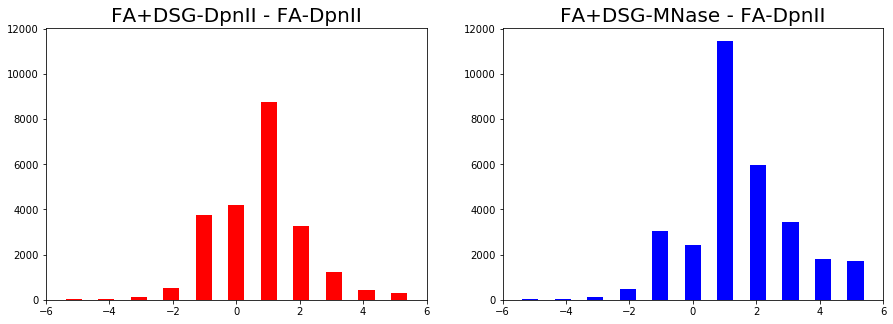

In [17]:
data_hff_dpnii=pd.read_csv("HFFC6_FA-DpnII_union_DSG-DpnII.bed",sep="\t",header=None)
data_hff_mnase=pd.read_csv("HFFc6_FA-DpnII_union_DSG-MNase.bed",sep="\t",header=None)


HFF_FA_DpnII = data_hff_dpnii.iloc[:,3]
HFF_DSG_DpnII = data_hff_dpnii.iloc[:,7]

HFF_FA_DpnII_2 = data_hff_mnase.iloc[:,3]
HFF_DSG_MNase = data_hff_mnase.iloc[:,7]


names_list = ['FA+DSG-DpnII - FA-DpnII','FA+DSG-MNase - FA-DpnII']


diff1=HFF_DSG_DpnII-HFF_FA_DpnII
diff2=HFF_DSG_MNase-HFF_FA_DpnII_2

datasets=[diff1,diff2]



bins = np.linspace(-10,10,40)
#bins = np.concatenate(([0],bins))


fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(nrows=1,ncols=len(datasets))

# histogram normalized to the total number of observations
normalized = False
colors=['r','b','g']

for i,(di,namei) in enumerate(zip(datasets,names_list)):
    di = [5 if x>5 else x for x in di]
    ax = plt.subplot(gs[0,i],sharex=ax,sharey=ax)
    ax.hist(di, bins=bins,label=namei,density=normalized,color=colors[i], alpha=1)
    #ax.hist(intersects[i], bins=bins,density=normalized,color=colors[i])
    plt.title(names_list[i],fontsize=20)
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.set_xlim(-6,6)
    #ax.set_ylim(0,1.5)
    #ax.set_xlabel('Hi-C signal')
    #ax.set_ylabel('Frequency')
    #plt.legend(fontsize=15)
    #ax.set_ylim(0,9000)
    #ax.set_yscale("log")
    plt.savefig("Anchor_diff_HFF.pdf")

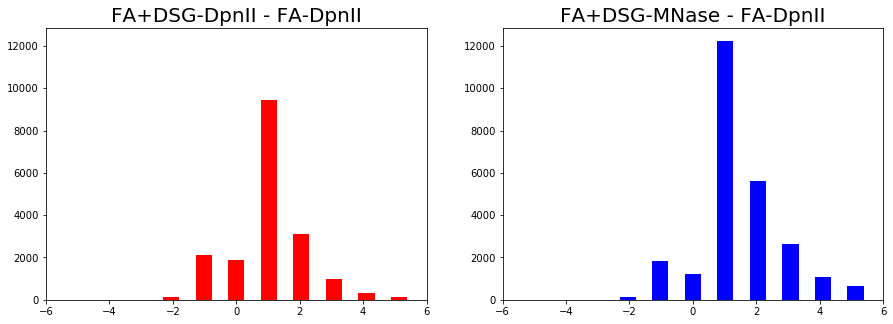

In [14]:
data_esc_dpnii=pd.read_csv("ESC_FA-DpnII_union_DSG-DpnII.bed",sep="\t",header=None)
data_esc_mnase=pd.read_csv("ESC_FA-DpnII_union_DSG-MNase.bed",sep="\t",header=None)


ESC_FA_DpnII = data_esc_dpnii.iloc[:,3]
ESC_DSG_DpnII = data_esc_dpnii.iloc[:,7]

ESC_FA_DpnII_2 = data_esc_mnase.iloc[:,3]
ESC_DSG_MNase = data_esc_mnase.iloc[:,7]


names_list = ['FA+DSG-DpnII - FA-DpnII','FA+DSG-MNase - FA-DpnII']


diff1=ESC_DSG_DpnII-ESC_FA_DpnII
diff2=ESC_DSG_MNase-ESC_FA_DpnII_2

datasets=[diff1,diff2]


bins = np.linspace(-10,10,40)
#bins = np.concatenate(([0],bins))


fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(nrows=1,ncols=len(datasets))

# histogram normalized to the total number of observations
normalized = False
colors=['r','b','g']

for i,(di,namei) in enumerate(zip(datasets,names_list)):
        di = [5 if x>5 else x for x in di]
        ax = plt.subplot(gs[0,i],sharex=ax,sharey=ax)
        ax.hist(di, bins=bins,label=namei,density=normalized,color=colors[i], alpha=1)
        #ax.hist(intersects[i], bins=bins,density=normalized,color=colors[i])
        plt.title(names_list[i],fontsize=20)
        #ax.set_xscale("log")
        #ax.set_yscale("log")
        ax.set_xlim(-6,6)
        #ax.set_ylim(0,1.5)
        #ax.set_xlabel('Hi-C signal')
        #ax.set_ylabel('Frequency')
        #plt.legend(fontsize=15)
        #ax.set_ylim(0,9000)
        #ax.set_yscale("log")
        plt.savefig("Anchor_diff_ESC.pdf")